# **Importaciones**

* `pandas`: Importa la biblioteca pandas como pd, utilizada para manipular y analizar datos estructurados en forma de tablas o dataframes.

* `matplotlib.pyplot`: Importa la biblioteca matplotlib.pyplot como plt, que se utiliza para crear gráficos y visualizaciones.

* `nltk`: Importa el paquete nltk (Natural Language Toolkit), una biblioteca especializada en procesamiento de lenguaje natural.

* `nltk.corpus.stopwords`: Carga las palabras vacías (stopwords) del corpus de NLTK, palabras comunes que generalmente se excluyen en análisis de texto.

* `nltk.tokenize`: Importa dos funciones de tokenización: word_tokenize para dividir el texto en palabras y sent_tokenize para dividir el texto en oraciones.

* `nltk.stem`: Importa dos métodos de lematización y stemming (reducción de palabras a su forma raíz): WordNetLemmatizer y PorterStemmer.

* `nltk.probability.FreqDist`: Importa la clase FreqDist que se utiliza para calcular la distribución de frecuencia de elementos, como palabras en un texto.

* `nltk.sentiment.SentimentIntensityAnalyzer`: Importa una herramienta para el análisis de sentimientos de texto.

* `nltk (etiquetado y chunking)`: Importa funciones para el etiquetado de partes del discurso (pos_tag), reconocimiento de entidades nombradas (ne_chunk), y la conversión de un árbol de chunks en el formato CoNLL (tree2conlltags).

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import ne_chunk, pos_tag
from nltk.chunk import tree2conlltags

# **Recursos Necesarios De NLTK**

* `punkt`: Un modelo utilizado para la tokenización de oraciones y palabras.
stopwords: Un conjunto de palabras comunes que suelen omitirse en análisis de texto (como "el", "de", "y").

* `averaged_perceptron_tagger`: Un etiquetador de partes del discurso (POS tagger) que asigna etiquetas gramaticales a las palabras.

* `wordnet`: Un diccionario léxico para la lematización, que ayuda a obtener la forma base de las palabras.

* `vader_lexicon`: Un lexicón de sentimientos utilizado para análisis de sentimientos con la herramienta VADER.

* `maxent_ne_chunker`: Un chunker basado en el clasificador de máxima entropía para reconocimiento de entidades nombradas.

* `words`: Un corpus de palabras en inglés, necesario para el reconocimiento de entidades y otros análisis de texto.

In [136]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

# **Lectura De CSV**
`data = pd.read_csv('./Datos.csv')`: Utiliza la función read_csv de la biblioteca pandas para leer un archivo CSV llamado Datos.csv ubicado en el directorio ./Data/. Los datos se almacenan en un dataframe llamado data para ser manipulados o analizados más adelante.

# **Lectura De TXT**
* `with open('./Coursera Comments.txt', 'r', encoding='utf-8') as file:`: Abre el archivo de texto llamado Coursera Comments.txt en modo de lectura ('r') y con codificación utf-8.

* `text_data = file.read()`: Lee todo el contenido del archivo y lo guarda en la variable text_data como una cadena de texto.

In [137]:
data = pd.read_csv('Datos.csv')
with open('Coursera Comments.txt', 'r', encoding='utf-8') as file:
    text_data = file.read()

# **Limpieza CSV**
1. Eliminación de datos faltantes y duplicados:

  * data.dropna(inplace=True): Elimina las filas que contienen valores faltantes en cualquier columna.

  * data.drop_duplicates(inplace=True): Elimina las filas duplicadas en el dataframe.

2. Modificación de la columna Review:

  * Elimina texto no deseado en la columna Review, reemplazando ciertas cadenas específicas:
    * ' reviews' se elimina de los textos.
    * Se eliminan las comillas (") y las comas (,).

3. Transformación de la columna Duration:

  * Extrae horas de duración usando diferentes patrones de texto:
    * Primer patrón: extrae horas de frases como "Approx. X hours to complete".
    * Segundo patrón: para frases como "X months at Y hours a week", convierte meses y horas por semana en una estimación de horas totales (X * 4 semanas * Y horas/semana).
    * Tercer patrón: extrae horas de frases como "X hours approximately".
  * combine_first: Combina estos valores, utilizando el primer patrón válido encontrado.
  * fillna(0): Rellena los valores faltantes con 0.
  * astype(int): Convierte la duración a enteros.

In [138]:
data.dropna(inplace = True) # Elimina filas con datos faltantes
data.drop_duplicates(inplace=True) # Elimina filas duplicadas
data.info()

data['Review'] = data['Review'].str.replace(' reviews','', regex=False)
data['Review'] = data['Review'].str.replace('"', '')
data['Review'] = data['Review'].str.replace(',', '')

data['Duration'] = data['Duration'].astype(str)

data['Duration'] = (
    data['Duration']
    .str.extract(r'Approx.\s*(\d+)\s*hours\s*to\s*complete', expand=False)
    .combine_first(
        data['Duration']
        .str.extract(r'(\d+)\s*months?\s*at\s*(\d+)\s*hours?\s*a\s*week', expand=False)
        .apply(lambda x: float(x[0]) * 4 * float(x[1]) if pd.notnull(x[0]) and pd.notnull(x[1]) else None, axis=1)
    )
    .combine_first(
        data['Duration'].str.extract(r'(\d+)\s*hours\s*(approximately)?', expand=False)[0].astype(float)
    )
)


data['Duration'] = data['Duration'].fillna(0)

data['Duration'] = data['Duration'].astype(int)

data.to_csv('DatosLimpios.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
Index: 3227 entries, 4 to 8654
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         3227 non-null   object 
 1   Rating               3227 non-null   float64
 2   Level                3227 non-null   object 
 3   Duration             3227 non-null   object 
 4   Schedule             3227 non-null   object 
 5   Review               3227 non-null   object 
 6   What you will learn  3227 non-null   object 
 7   Skill gain           3227 non-null   object 
 8   Modules              3227 non-null   object 
 9   Instructor           3227 non-null   object 
 10  Offered By           3227 non-null   object 
 11  Keyword              3227 non-null   object 
 12  Course Url           3227 non-null   object 
dtypes: float64(1), object(12)
memory usage: 353.0+ KB


# **Calificación Promedio Por Curso**

1. Cálculo de la calificación promedio:

  * avg_rating_per_course = data.groupby('Course Title')['Rating'].mean(): Agrupa los datos por el título del curso y calcula la calificación promedio (Rating) para cada curso.

2. Reajuste del índice:

  * avg_rating_per_course = avg_rating_per_course.reset_index(): Resetea el índice del dataframe para convertir el resultado en un dataframe estándar.

3. Redondeo de calificaciones:

  * avg_rating_per_course['Rating'] = avg_rating_per_course['Rating'].round(1): Redondea las calificaciones a un decimal.

4. Formato de títulos de cursos:
  * avg_rating_per_course['Course Title'] = avg_rating_per_course['Course Title'].str.replace('|', '\\|', regex=False): Reemplaza cualquier barra vertical (|) en los títulos de los cursos para evitar problemas en la visualización de Markdown.

5. Generación de líneas en formato Markdown:
  * lines = avg_rating_per_course.apply(lambda x: f"|{x['Course Title']}|{x['Rating']}|", axis=1): Aplica una función para formatear cada fila como una línea en Markdown, con títulos de cursos y calificaciones.

6. Escritura en un archivo Markdown:
  * with open('./Reports/Calificacion Promedio Por Curso.md', 'w+', encoding='utf-8') as file:: Abre (o crea) un archivo Markdown para escribir.
  * file.write('## Calificacion Promedio Por Curso\n|Course Title|Rating|\n|:-|:-|\n'): Escribe el encabezado del archivo y las cabeceras de la tabla.
  * for line in lines:: Itera sobre las líneas formateadas y las escribe en el archivo, una por línea.


In [140]:
avg_rating_per_course = data.groupby('Course Title')['Rating'].mean()
avg_rating_per_course = avg_rating_per_course.reset_index()
avg_rating_per_course['Rating'] = avg_rating_per_course['Rating'].round(1)
avg_rating_per_course['Course Title'] = avg_rating_per_course['Course Title'].str.replace('|', '\\|', regex=False)
lines = avg_rating_per_course.apply(lambda x: f"|{x['Course Title']}|{x['Rating']}|", axis=1)

with open('./Reports/Calificacion Promedio Por Curso.md', 'w+', encoding='utf-8') as file:
    file.write('## Calificacion Promedio Por Curso\n|Course Title|Rating|\n|:-|:-|\n')
    for line in lines:
        file.write(line + '\n')

# **Curso Con Mayor Y Menor Rating**

1. Identificación de los cursos con calificación extrema:

  * highest_rated_course = data.loc[data['Rating'].idxmax()]: Encuentra el curso con la calificación más alta usando idxmax() para obtener el índice del valor máximo.
  * lowest_rated_course = data.loc[data['Rating'].idxmin()]: Encuentra el curso con la calificación más baja usando idxmin() para obtener el índice del valor mínimo.

2. Definición de encabezados:
  * headers = [...]: Crea una lista de encabezados que describen las columnas relevantes del curso.

3. Preparación del informe:
  * report = [headers, list(map(str, highest_rated_course)), list(map(str, lowest_rated_course))]: Crea una lista que contiene los encabezados y las representaciones de cadena de los cursos con calificaciones más alta y más baja.

4. Escritura en un archivo Markdown:
  * with open('./Reports/Curso Rating.md', 'w+', encoding='utf-8') as file:: Abre (o crea) un archivo Markdown para escribir.
  * file.write('## Curso Con Mayor Y Menor Rating\n||Mayor Rating|Menor Rating|\n|-|-|-|\n'): Escribe el encabezado del informe y las cabeceras de la tabla.
  * for j in range(0, len(headers)):: Itera sobre los encabezados para construir las filas del informe.
    * file.write('|'): Inicia la escritura de una nueva fila en la tabla.
    * for i in range(0, len(report)):: Itera sobre los elementos de report
      * Condicional: Verifica si el valor no es una lista (no contiene [ o ]). Si no es una lista, escribe el valor directamente; si es una lista, evalúa y une los elementos con comas.
    * file.write('\n'): Finaliza la escritura de la fila.

In [141]:
highest_rated_course = data.loc[data['Rating'].idxmax()]
lowest_rated_course = data.loc[data['Rating'].idxmin()]

headers = ["Course Title", "Rating", "Level", "Duration", "Schedule", "Review", "What you will learn", "Skill gain", "Modules", "Instructor", "Offered By", "Keyword", "Course Url"]

report = [headers, list(map(str, highest_rated_course)), list(map(str, lowest_rated_course))]

with open('./Reports/Curso Rating.md', 'w+', encoding='utf-8') as file:
    file.write('## Curso Con Mayor Y Menor Rating\n||Mayor Rating|Menor Rating|\n|-|-|-|\n')
    for j in range(0, len(headers)):
        file.write('|')
        for i in range(0, len(report)):
            if not all(char in report[i][j] for char in ['[', ']']):
                file.write(report[i][j])
            else:
                file.write(', '.join(eval(report[i][j])))
            file.write('|')
        file.write('\n')

# **Porcentaje De Cursos Con Horario Flexible**

1. Filtrado de cursos con horario flexible:
  * flexible_courses = data[data['Schedule'] == 'Flexible schedule']: Filtra el dataframe data para obtener solo los cursos que tienen un horario flexible, creando un nuevo dataframe flexible_courses.

2. Cálculo del porcentaje:
  * percentage_flexible = (len(flexible_courses) / len(data)) * 100: Calcula el porcentaje de cursos con horario flexible dividiendo el número de cursos flexibles (len(flexible_courses)) por el total de cursos (len(data)) y multiplicando por 100.

3. Impresión del resultado:
  * print(f"Porcentaje de cursos con horario flexible: {percentage_flexible:.2f} %"): Imprime el porcentaje calculado con dos decimales.

In [142]:
flexible_courses = data[data['Schedule'] == 'Flexible schedule']
percentage_flexible = (len(flexible_courses) / len(data)) * 100
print(f"Porcentaje de cursos con horario flexible: {percentage_flexible:.2f} %")

Porcentaje de cursos con horario flexible: 100.00 %


# **Número de cursos por nivel de dificultad**

1. Conteo de niveles de dificultad:
  * difficulty_counts = data['Level'].value_counts(): Utiliza el método value_counts() para contar cuántos cursos hay en cada nivel de dificultad, creando una serie que almacena estos conteos en difficulty_counts.

2. Generación del gráfico de barras:
  * difficulty_counts.plot(kind='bar', title='Número de cursos por nivel de dificultad'): Crea un gráfico de barras utilizando los conteos de niveles de dificultad. Se establece el título del gráfico como "Número de cursos por nivel de dificultad".

3. Etiquetas de los ejes:
  * plt.ylabel('Número de Cursos'): Asigna una etiqueta al eje Y indicando que representa el número de cursos.
  * plt.xlabel('Nivel de Dificultad'): Asigna una etiqueta al eje X indicando que representa los niveles de dificultad.

4. Visualización del gráfico:
  * plt.show(): Muestra el gráfico generado en una ventana.

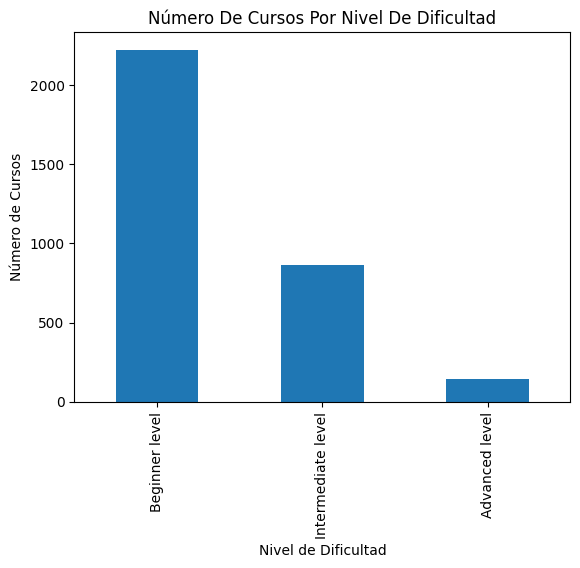

In [143]:
difficulty_counts = data['Level'].value_counts()
difficulty_counts.plot(kind='bar', title='Número De Cursos Por Nivel De Dificultad')
plt.ylabel('Número de Cursos')
plt.xlabel('Nivel de Dificultad')
plt.savefig(os.path.join('./Reports', 'Número De Cursos Por Nivel De Dificultad.png'))
plt.show()

# **Número De Cursos Por Categoría Principal**

1. Conteo de cursos por categoría:
  * category_counts = data['Keyword'].value_counts(): Utiliza el método value_counts() para contar cuántos cursos hay en cada categoría principal, creando una serie que almacena estos conteos en category_counts.

2. Generación del gráfico de barras horizontal:
  * category_counts.plot(kind='barh', title='Número De Cursos Por Categoría Principal'): Crea un gráfico de barras horizontal utilizando los conteos de categorías. Se establece el título del gráfico como "Número De Cursos Por Categoría Principal".

3. Etiqueta del eje X:
  * plt.xlabel('Número de Cursos'): Asigna una etiqueta al eje X indicando que representa el número de cursos.

4. Visualización del gráfico:
  * plt.show(): Muestra el gráfico generado en una ventana.

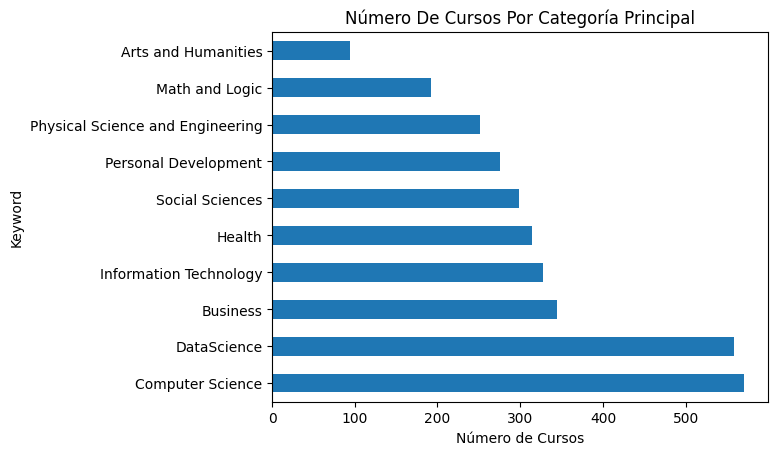

In [144]:
category_counts = data['Keyword'].value_counts()
category_counts.plot(kind='barh', title='Número De Cursos Por Categoría Principal')
plt.xlabel('Número de Cursos')
plt.savefig(os.path.join('./Reports', 'Número De Cursos Por Categoría Principal.png'))
plt.show()

# **Duración Del Curso vs Número De Revisiones**

1. Creación del gráfico de dispersión:
  * plt.scatter(data['Duration'], data['Review']): Genera un gráfico de dispersión utilizando los datos de duración de los cursos (en horas) en el eje X y el número de revisiones en el eje Y

2. Título del gráfico:
  * plt.title('Duración Del Curso vs Número De Revisiones'): Establece el título del gráfico como "Duración Del Curso vs Número De Revisiones".

3. Etiquetas de los ejes:
  * plt.xlabel('Duración (horas)'): Asigna una etiqueta al eje X indicando que representa la duración del curso en horas.
  * plt.ylabel('Número de Revisiones'): Asigna una etiqueta al eje Y indicando que representa el número de revisiones.

4. Visualización del gráfico:
  * plt.show(): Muestra el gráfico generado en una ventana.

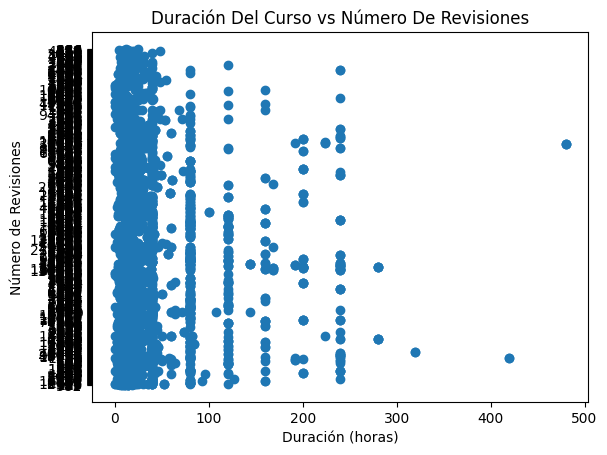

In [145]:
plt.scatter(data['Duration'], data['Review'])
plt.title('Duración Del Curso vs Número De Revisiones')
plt.xlabel('Duración (horas)')
plt.ylabel('Número de Revisiones')
plt.savefig(os.path.join('./Reports', 'Duración Del Curso vs Número De Revisiones.png'))
plt.show()

# **Distribución De Duraciones De Los Cursos**

1. Creación del histograma:
  * plt.hist(data['Duration'], bins=10): Genera un histograma utilizando los datos de duración de los cursos, dividiendo los datos en 10 intervalos (bins) para mostrar la frecuencia de las duraciones en cada rango.

2. Título del histograma:
  * plt.title('Distribución De Duraciones De Los Cursos'): Establece el título del histograma como "Distribución De Duraciones De Los Cursos".

3. Etiquetas de los ejes:
  * plt.xlabel('Duración (horas)'): Asigna una etiqueta al eje X indicando que representa la duración del curso en horas.
  * plt.ylabel('Frecuencia'): Asigna una etiqueta al eje Y indicando que representa la frecuencia, o el número de cursos que caen dentro de cada intervalo de duración.

4. Visualización del histograma:
  * plt.show(): Muestra el histograma generado en una ventana.

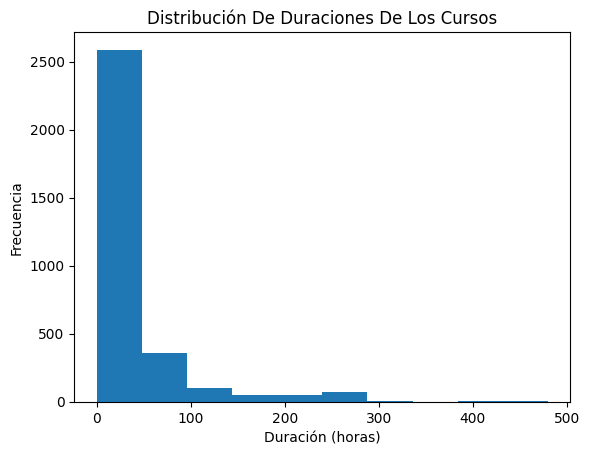

In [146]:
plt.hist(data['Duration'], bins=10)
plt.title('Distribución De Duraciones De Los Cursos')
plt.xlabel('Duración (horas)')
plt.ylabel('Frecuencia')
plt.savefig(os.path.join('./Reports', 'Distribución De Duraciones De Los Cursos.png'))
plt.show()

# **Distribución De Calificaciones Por Nivel De Dificultad**

1. Creación del diagrama de caja:
  * data.boxplot(column='Rating', by='Level', grid=False): Genera un diagrama de caja para la columna de calificaciones (Rating), agrupando los datos por el nivel de dificultad (Level). La opción grid=False se utiliza para no mostrar la cuadrícula en el gráfico.

2. Título del gráfico:
  * plt.title('Distribución de Calificaciones por Nivel de Dificultad'): Establece el título del gráfico como "Distribución de Calificaciones por Nivel de Dificultad".

3. Eliminación del título de agrupación:
  * plt.suptitle(''): Se utiliza para eliminar el título de agrupación que se genera automáticamente cuando se utiliza by en el boxplot.

4. Etiqueta del eje Y:
  * plt.ylabel('Calificación'): Asigna una etiqueta al eje Y indicando que representa las calificaciones de los cursos.

5. Visualización del gráfico:
  * plt.show(): Muestra el diagrama de caja generado en una ventana.

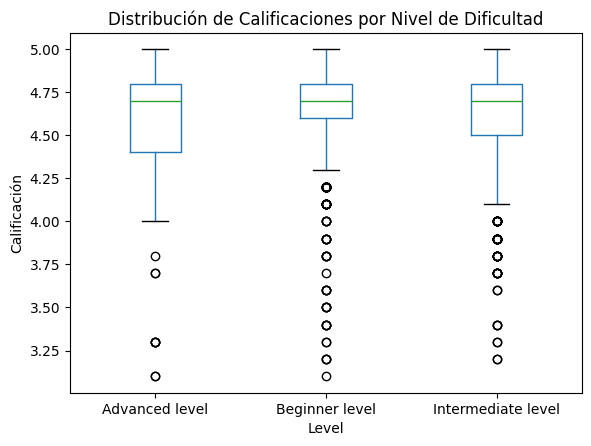

In [147]:
data.boxplot(column='Rating', by='Level', grid=False)
plt.title('Distribución de Calificaciones por Nivel de Dificultad')
plt.suptitle('')
plt.ylabel('Calificación')
plt.savefig(os.path.join('./Reports', 'Distribución de Calificaciones por Nivel de Dificultad.png'))
plt.show()


# **Tokenización**

1. Tokenización del texto:
  * tokens = word_tokenize(text_data): Utiliza la función word_tokenize de la biblioteca NLTK para dividir el texto en palabras individuales, creando una lista de tokens a partir de text_data.

2. Creación y apertura del archivo Markdown:
  * with open('./Reports/TXT/Tokenizacion.md', 'w+', encoding='utf-8') as file:: Abre (o crea si no existe) un archivo llamado Tokenizacion.md en la carpeta ./Reports/TXT/ para escribir los tokens. La opción w+ permite leer y escribir en el archivo, y encoding='utf-8' asegura que se manejen correctamente los caracteres especiales.

3. Escritura del encabezado en el archivo:
  * file.write('## Tokenización TXT\n'): Escribe el título "Tokenización TXT" en el archivo como un encabezado de segundo nivel en Markdown.

4. Creación de las líneas de separación:
  * file.write('|' * 453 + '\n'): Escribe una línea de separación de 453 caracteres verticales (|).
  * file.write('|:-' * 452 + '|\n'): Escribe una línea de separación que define el formato de las columnas en Markdown.

5. Escritura de los tokens en el archivo:
  * Se utiliza un bucle for para iterar sobre cada token en la lista tokens.
  * file.write(f'|{tokens[i]}'): Escribe cada token en el archivo, rodeado de acentos graves (backticks) para formatearlo como código en Markdown.
  * Control de salto de línea:
    * if c == 452:: Si se han escrito 452 tokens en la línea actual, se añade un salto de línea y se reinicia el contador c.
    * c += 1: Incrementa el contador después de cada token.

In [148]:
nltk.download('punkt_tab')
tokens = word_tokenize(text_data)

with open('./Reports/TXT/Tokenizacion.md', 'w+', encoding='utf-8') as file:
    file.write('## Tokenización TXT\n')
    file.write('|' * 453 + '\n')
    file.write('|:-' * 452 + '|\n')
    c = 1
    for i in range(0, len(tokens)):
        file.write(f'|`{tokens[i]}`')
        if c == 452:
            file.write('|\n')
            c = 0
        c += 1

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **Lematización**

1. Inicialización del lematizador:
  * lemmatizer = WordNetLemmatizer(): Crea una instancia de WordNetLemmatizer, una clase de la biblioteca NLTK que se utiliza para lematizar palabras, es decir, reducir las palabras a su forma base o raíz.

2. Lematización de los tokens:
  * lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]: Utiliza una lista de comprensión para aplicar el método lemmatize a cada token en la lista tokens. Esto crea una nueva lista lemmatized_words, que contiene las versiones lematizadas de las palabras.

3. Creación y apertura del archivo Markdown:
  * with open('./Reports/TXT/Lematizacion.md', 'w+', encoding='utf-8') as file:: Abre (o crea si no existe) un archivo llamado Lematizacion.md en la carpeta ./Reports/TXT/ para escribir las palabras lematizadas. La opción w+ permite leer y escribir en el archivo, y encoding='utf-8' asegura que se manejen correctamente los caracteres especiales.

4. Escritura del encabezado en el archivo:
  * file.write('## Lematización TXT\n'): Escribe el título "Lematización TXT" en el archivo como un encabezado de segundo nivel en Markdown.

5. Creación de las líneas de separación:
  * file.write('|' * 453 + '\n'): Escribe una línea de separación de 453 caracteres verticales (|).
  * file.write('|:-' * 452 + '|\n'): Escribe una línea de separación que define el formato de las columnas en Markdown.

6. Escritura de las palabras lematizadas en el archivo:
  * Se utiliza un bucle for para iterar sobre cada palabra en la lista lemmatized_words.
  * file.write(f'|{lemmatized_words[i]}'): Escribe cada palabra lematizada en el archivo, rodeada de acentos graves (backticks) para formatearla como código en Markdown.
  * Control de salto de línea:
    * if c == 452:: Si se han escrito 452 palabras en la línea actual, se añade un salto de línea y se reinicia el contador c.
    * c += 1: Incrementa el contador después de cada palabra.

In [149]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(token) for token in tokens]

with open('./Reports/TXT/Lematizacion.md', 'w+', encoding='utf-8') as file:
    file.write('## Lematización TXT\n')
    file.write('|' * 453 + '\n')
    file.write('|:-' * 452 + '|\n')
    c = 1
    for i in range(0, len(lemmatized_words)):
        file.write(f'|`{lemmatized_words[i]}`')
        if c == 452:
            file.write('|\n')
            c = 0
        c += 1

# **Stemming**

1. Inicialización del stemmer:
  * stemmer = PorterStemmer(): Crea una instancia de PorterStemmer, una clase de la biblioteca NLTK que se utiliza para realizar stemming, que es el proceso de reducir palabras a su raíz o forma base.

2. Stemming de los tokens:
  * stemmed_words = [stemmer.stem(token) for token in tokens]: Utiliza una lista de comprensión para aplicar el método stem a cada token en la lista tokens. Esto crea una nueva lista stemmed_words, que contiene las versiones en su forma raíz de las palabras.

3. Creación y apertura del archivo Markdown:
  * with open('./Reports/TXT/Stemming.md', 'w+', encoding='utf-8') as file:: Abre (o crea si no existe) un archivo llamado Stemming.md en la carpeta ./Reports/TXT/ para escribir las palabras con stemming. La opción w+ permite leer y escribir en el archivo, y encoding='utf-8' asegura que se manejen correctamente los caracteres especiales.

4. Escritura del encabezado en el archivo:
  * file.write('## Stemming TXT\n'): Escribe el título "Stemming TXT" en el archivo como un encabezado de segundo nivel en Markdown.

5. Creación de las líneas de separación:
  * file.write('|' * 453 + '\n'): Escribe una línea de separación de 453 caracteres verticales (|).
  * file.write('|:-' * 452 + '|\n'): Escribe una línea de separación que define el formato de las columnas en Markdown.

6. Escritura de las palabras con stemming en el archivo:
  * Se utiliza un bucle for para iterar sobre cada palabra en la lista stemmed_words.
  * file.write(f'|{stemmed_words[i]}'): Escribe cada palabra con stemming en el archivo, rodeada de acentos graves (backticks) para formatearla como código en Markdown.
  * Control de salto de línea:
    * if c == 452:: Si se han escrito 452 palabras en la línea actual, se añade un salto de línea y se reinicia el contador c.
    * c += 1: Incrementa el contador después de cada palabra.

In [150]:
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(token) for token in tokens]

with open('./Reports/TXT/Stemming.md', 'w+', encoding='utf-8') as file:
    file.write('## Stemming TXT\n')
    file.write('|' * 453 + '\n')
    file.write('|:-' * 452 + '|\n')
    c = 1
    for i in range(0, len(stemmed_words)):
        file.write(f'|`{stemmed_words[i]}`')
        if c == 452:
            file.write('|\n')
            c = 0
        c += 1

# **Eliminación de palabras vacías**

1. Definición de palabras vacías:
  * stop_words = set(stopwords.words('spanish')): Crea un conjunto de palabras vacías en español utilizando la lista de palabras vacías proporcionada por la biblioteca NLTK. Estas palabras son comúnmente usadas en el idioma y se consideran irrelevantes para el análisis de texto.

2. Filtrado de palabras:
  * filtered_words = [word for word in tokens if word.lower() not in stop_words]: Utiliza una lista de comprensión para crear una nueva lista filtered_words, que contiene solo aquellas palabras de tokens que no están en el conjunto de palabras vacías. Se convierte cada palabra a minúsculas para realizar la comparación de manera insensible a mayúsculas.

3. Creación y apertura del archivo Markdown:
  * with open('./Reports/TXT/Palabras Vacias.md', 'w+', encoding='utf-8') as file:: Abre (o crea si no existe) un archivo llamado Palabras Vacias.md en la carpeta ./Reports/TXT/ para escribir las palabras filtradas. La opción w+ permite leer y escribir en el archivo, y encoding='utf-8' asegura que se manejen correctamente los caracteres especiales.

4. Escritura del encabezado en el archivo:
  * file.write('## Palabras Vacías TXT\n'): Escribe el título "Palabras Vacías TXT" en el archivo como un encabezado de segundo nivel en Markdown.

5. Creación de las líneas de separación:
  * file.write('|' * 453 + '\n'): Escribe una línea de separación de 453 caracteres verticales (|).
  * file.write('|:-' * 452 + '|\n'): Escribe una línea de separación que define el formato de las columnas en Markdown.

6. Escritura de las palabras filtradas en el archivo:
  * Se utiliza un bucle for para iterar sobre cada palabra en la lista filtered_words.
  * file.write(f'|{filtered_words[i]}'): Escribe cada palabra filtrada en el archivo, rodeada de acentos graves (backticks) para formatearla como código en Markdown.
  * Control de salto de línea:
    * if c == 452:: Si se han escrito 452 palabras en la línea actual, se añade un salto de línea y se reinicia el contador c.
    * c += 1: Incrementa el contador después de cada palabra.

In [151]:
stop_words = set(stopwords.words('spanish'))
filtered_words = [word for word in tokens if word.lower() not in stop_words]

with open('./Reports/TXT/Palabras Vacias.md', 'w+', encoding='utf-8') as file:
    file.write('## Palabras Vacías TXT\n')
    file.write('|' * 453 + '\n')
    file.write('|:-' * 452 + '|\n')
    c = 1
    for i in range(0, len(filtered_words)):
        file.write(f'|`{filtered_words[i]}`')
        if c == 452:
            file.write('|\n')
            c = 0
        c += 1

# **Frecuencia de palabras**

1. Cálculo de la frecuencia de palabras:
  * fdist = FreqDist(filtered_words): Crea un objeto FreqDist utilizando la lista de palabras filtradas (filtered_words). Este objeto cuenta la frecuencia de cada palabra en la lista.
  * frequency_words = fdist.most_common(): Obtiene una lista de tuplas con las palabras y sus frecuencias en orden descendente. Cada tupla contiene una palabra y su cantidad de ocurrencias.

2. Cálculo de la frecuencia de palabras:
  * with open('./Reports/TXT/Frecuencia Palabras.md', 'w+', encoding='utf-8') as file:: Abre (o crea si no existe) un archivo llamado Frecuencia Palabras.md en la carpeta ./Reports/TXT/ para escribir las palabras y sus frecuencias. La opción w+ permite leer y escribir en el archivo, y encoding='utf-8' asegura que se manejen correctamente los caracteres especiales.

3. Escritura del encabezado en el archivo:
  * file.write('## Frecuencia Palabras TXT\n'): Escribe el título "Frecuencia Palabras TXT" en el archivo como un encabezado de segundo nivel en Markdown.
  * file.write('|Palabra|Frecuencia' * 100 + '|\n'): Escribe la cabecera de la tabla en el archivo, indicando las columnas "Palabra" y "Frecuencia". Se repite 100 veces para crear un formato de tabla que puede ser usado en Markdown.
  * file.write('|:-' * 200 + '|\n'): Escribe una línea que define el formato de las columnas en Markdown.

4. Escritura de las frecuencias de palabras en el archivo:
  * Se utiliza un bucle for para iterar sobre cada tupla en la lista frequency_words.
  * file.write(f'|{frequency_words[i][0]}|{frequency_words[i][1]}'): Escribe cada palabra y su frecuencia en el archivo, rodeadas de acentos graves (backticks) para formatearlas como código en Markdown.
  * Control de salto de línea:
    * if c == 100:: Si se han escrito 100 palabras en la línea actual, se añade un salto de línea y se reinicia el contador c.
    * c += 1: Incrementa el contador después de cada palabra.

In [152]:
fdist = FreqDist(filtered_words)
frequency_words = fdist.most_common()

with open('./Reports/TXT/Frecuencia Palabras.md', 'w+', encoding='utf-8') as file:
    file.write('## Frecuencia Palabras TXT\n')
    file.write('|Palabra|Frecuencia' * 100 + '|\n')
    file.write('|:-' * 200 + '|\n')
    c = 1
    for i in range(0, len(frequency_words)):
        file.write(f'|`{frequency_words[i][0]}`|`{frequency_words[i][1]}`')
        if c == 100:
            file.write('|\n')
            c = 0
        c += 1

# **Análisis de sentimientos**

1. Inicialización del analizador de sentimientos:
  * sia = SentimentIntensityAnalyzer(): Crea una instancia del analizador de sentimientos de NLTK (Natural Language Toolkit), que se utiliza para calcular el puntaje de polaridad del texto.

2. Cálculo de los sentimientos:
  * sentiment = sia.polarity_scores(text_data): Aplica el analizador de sentimientos al texto (text_data) y obtiene un diccionario con las puntuaciones de diferentes categorías de sentimiento, que incluye:
    * neg: Porcentaje de sentimiento negativo.
    * neu: Porcentaje de sentimiento neutral.
    * pos: Porcentaje de sentimiento positivo.
    * compound: Un puntaje que resume la polaridad del texto en un solo valor.

3. Creación y apertura del archivo Markdown:
  * with open('./Reports/TXT/Sentimientos.md', 'w+', encoding='utf-8') as file:: Abre (o crea si no existe) un archivo llamado Sentimientos.md en la carpeta ./Reports/TXT/ para escribir los resultados. La opción w+ permite leer y escribir en el archivo, y encoding='utf-8' asegura el manejo correcto de caracteres especiales.

4. Escritura del encabezado y los resultados en el archivo:
  * file.write('## Sentimientos TXT\n'): Escribe el título "Sentimientos TXT" en el archivo como un encabezado de segundo nivel en Markdown.
  * file.write('|Sentimiento|Porcentaje|\n|:-|:-|\n'): Escribe la cabecera de la tabla que contendrá los sentimientos y sus porcentajes.
  * file.write(f'|Negativos|{sentiment["neg"] * 100:.2f} %|\n'): Escribe el porcentaje de sentimientos negativos en la tabla, multiplicando el valor por 100 para convertirlo en porcentaje y formateándolo a dos decimales.
  * file.write(f'|Neutros|{sentiment["neu"] * 100:.2f} %|\n'): Hace lo mismo para los sentimientos neutros.
  * file.write(f'|Positivos|{sentiment["pos"] * 100:.2f} %|\n\n'): Y para los sentimientos positivos.

5. Escritura del resumen del sentimiento mayoritario:
  * **file.write(f'**Sentimientos mayormente {"Negativos" if sentiment["compound"] < 0 else ("Positivos" if sentiment["compound"] > 0 else "Neutros")}**')**: Escribe un resumen que indica si el sentimiento general del texto es negativo, positivo o neutro, basado en el valor compound. Este valor se utiliza para determinar el sentimiento predominante y se formatea como texto en negrita en Markdown.

In [153]:
# Análisis de sentimientos
sia = SentimentIntensityAnalyzer()
sentiment = sia.polarity_scores(text_data)

with open('./Reports/TXT/Sentimientos.md', 'w+', encoding='utf-8') as file:
    file.write('## Sentimientos TXT\n')
    file.write('|Sentimiento|Porcentaje|\n|:-|:-|\n')
    file.write(f'|Negativos|{sentiment["neg"] * 100:.2f} %|\n')
    file.write(f'|Neutros|{sentiment["neu"] * 100:.2f} %|\n')
    file.write(f'|Positivos|{sentiment["pos"] * 100:.2f} %|\n\n')
    file.write(f'**Sentimientos mayormente {"Negativos" if sentiment["compound"] < 0 else ("Positivos" if sentiment["compound"] > 0 else "Neutros")}**')

# **Entidades**

1. Etiquetado de partes del habla:
  * pos_tagged_tokens = pos_tag(tokens): Utiliza la función pos_tag de NLTK para etiquetar los tokens generados anteriormente con sus respectivas partes del habla (POS). Esto significa que cada token se clasificará como un sustantivo, verbo, adjetivo, etc.

2. Reconocimiento de entidades nombradas:
  * entities = ne_chunk(pos_tagged_tokens, binary=False): Aplica el reconocimiento de entidades nombradas a los tokens etiquetados. La función ne_chunk agrupa los tokens en entidades y devuelve un árbol donde las entidades están etiquetadas según su tipo (persona, organización, ubicación, etc.). El parámetro binary=False indica que se deben conservar las etiquetas específicas en lugar de agrupar todas las entidades en una sola categoría.

3. Extracción de entidades en formato texto:
  * iob_tagged = tree2conlltags(entities): Convierte el árbol de entidades en formato IOB (Inside, Outside, Beginning) utilizando la función tree2conlltags. Esto proporciona una representación más fácil de manipular para las entidades nombradas.
  * named_entities = [word for word, pos, ne in iob_tagged if ne != 'O']: Extrae solo aquellas palabras que han sido etiquetadas como entidades (es decir, aquellas que no están etiquetadas como 'O', que significa "no entidad"). Se crea una lista de named_entities que contiene solo los nombres de las entidades.

4. Creación y apertura del archivo Markdown:
  * with open('./Reports/TXT/Entidades.md', 'w+', encoding='utf-8') as file:: Abre (o crea si no existe) un archivo llamado Entidades.md en la carpeta ./Reports/TXT/ para escribir los resultados. La opción w+ permite leer y escribir en el archivo, y encoding='utf-8' asegura el manejo correcto de caracteres especiales.

5. Escritura del encabezado y las entidades en el archivo:
  * file.write('## Entidades TXT\n'): Escribe el título "Entidades TXT" en el archivo como un encabezado de segundo nivel en Markdown.
  * file.write('|' * 453 + '\n'): Escribe una línea de separación para la tabla. Se crea una línea que contenga 453 caracteres |.
  * file.write('|:-' * 452 + '|\n'): Define el formato de las columnas de la tabla con una línea de separación que establece la alineación de las columnas.
  * c = 1: Inicializa un contador c para controlar el número de entidades escritas en cada línea de la tabla.
  * Bucle para escribir las entidades:
    * for i in range(0, len(named_entities)):: Itera a través de la lista de entidades nombradas.
    * file.write(f'|{named_entities[i]}'): Escribe cada entidad entre comillas invertidas (backticks) para formatear el texto como código en Markdown.
    * if c == 452:: Si se ha alcanzado el límite de 452 entidades por línea:
      * file.write('|\n'): Cierra la línea de la tabla y comienza una nueva.
      * c = 0: Reinicia el contador a 0.
    * c += 1: Incrementa el contador en cada iteración.

In [155]:
import nltk
from nltk import pos_tag, ne_chunk
from nltk.chunk import tree2conlltags
import os

# Descargar los recursos necesarios
nltk.download('punkt')  # Asegúrate de que tienes tokenización
nltk.download('averaged_perceptron_tagger')  # Asegúrate de que tienes el modelo POS correcto
nltk.download('maxent_ne_chunker')
nltk.download('words')

# Aquí va tu código donde defines 'tokens' (esto puede depender de tu caso)
tokens = nltk.word_tokenize("Tu texto aquí")  # Este es solo un ejemplo

try:
    # Forzar el uso del modelo 'averaged_perceptron_tagger' para POS tagging
    pos_tagged_tokens = pos_tag(tokens)

    # Reconocimiento de entidades nombradas (NER)
    entities = ne_chunk(pos_tagged_tokens, binary=False)

    # Convertir el árbol de entidades a etiquetas IOB
    iob_tagged = tree2conlltags(entities)

    # Extraer las entidades nombradas
    named_entities = [word for word, pos, ne in iob_tagged if ne != 'O']

except Exception as e:
    print(f"Error al hacer reconocimiento de entidades: {e}")
    named_entities = []  # Deja lista vacía si falla

# Escritura de las entidades a archivo
os.makedirs('./Reports/TXT', exist_ok=True)
with open('./Reports/TXT/Entidades.md', 'w+', encoding='utf-8') as file:
    file.write('## Entidades TXT\n')
    file.write('|' * 453 + '\n')
    file.write('|:-' * 452 + '|\n')
    c = 1
    for i in range(0, len(named_entities)):
        file.write(f'|`{named_entities[i]}`')
        if c == 452:
            file.write('|\n')
            c = 0
        c += 1


Error al hacer reconocimiento de entidades: 
**********************************************************************
  Resource averaged_perceptron_tagger_eng not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('averaged_perceptron_tagger_eng')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load taggers/averaged_perceptron_tagger_eng/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


# **Cantidades**

1. Impresión de la cantidad de tokens
2. Impresión de la cantidad de palabras lematizadas
3. Impresión de la cantidad de palabras con stemming
4. Impresión de la cantidad de palabras filtradas
5. Impresión de la cantidad de palabras en la frecuencia
6. Impresión de la cantidad de resultados del análisis de sentimientos
7. Impresión de la cantidad de entidades extraídas

In [156]:
print("Tokens:", len(tokens))
print("Lematización:", len(lemmatized_words))
print("Stemming:", len(stemmed_words))
print("Sin palabras vacías:", len(filtered_words))
print("Frecuencia de palabras:", len(frequency_words))
print("Análisis de sentimientos:", len(sentiment))
print("Entidades extraídas:", len(named_entities))

Tokens: 3
Lematización: 204876
Stemming: 204876
Sin palabras vacías: 118785
Frecuencia de palabras: 15895
Análisis de sentimientos: 4
Entidades extraídas: 0
